In [27]:
import pandas as pd

In [28]:
# Cargar los dos archivos CSV
df_leche = pd.read_csv(
    '/kaggle/input/yarumal-leche/leche_yarumal_ipc_limpio.csv',
    dtype={
        'código departamento': str,
        'código municipio': str
    }   
)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   año                        144 non-null    int64  
 1   mes                        144 non-null    int64  
 2   nombre departamento        144 non-null    object 
 3   código departamento        144 non-null    object 
 4   nombre municipio           144 non-null    object 
 5   código municipio           144 non-null    object 
 6   precio promedio por litro  144 non-null    float64
 7   ipc                        144 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 9.1+ KB


,año,mes,nombre departamento,código departamento,nombre municipio,código municipio,precio promedio por litro,ipc
0,2013,1,antioquia,05,yarumal,05887,853.410677,112.1490
1,2013,2,antioquia,05,yarumal,05887,865.888855,112.6471
2,2013,3,antioquia,05,yarumal,05887,844.620447,112.8788
3,2013,4,antioquia,05,yarumal,05887,875.421163,113.1643
4,2013,5,antioquia,05,yarumal,05887,847.117207,113.4797


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


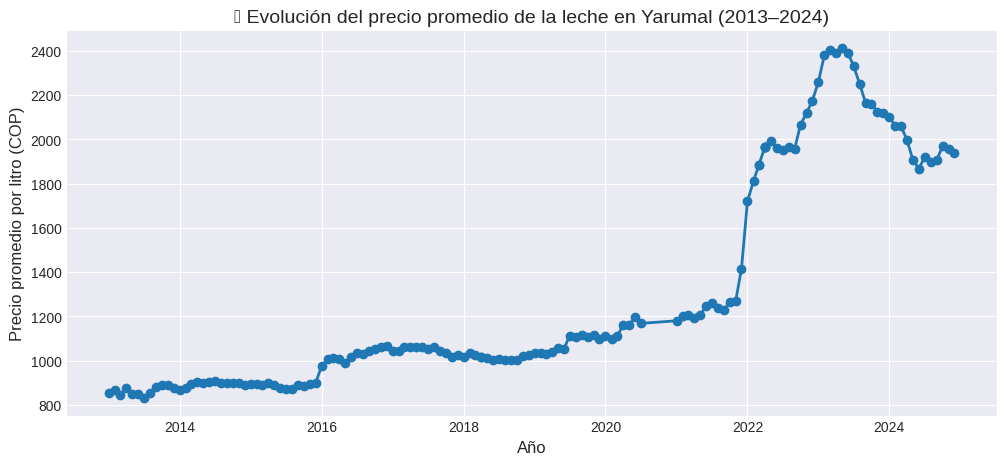

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


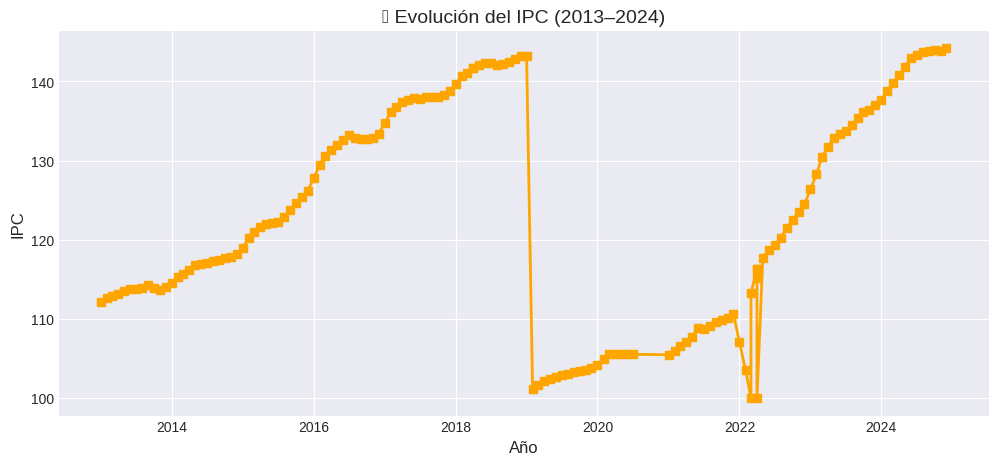

In [30]:
import matplotlib.pyplot as plt

# --- Crear una columna de fecha combinando año y mes ---
leche_ipc['fecha'] = pd.to_datetime(leche_ipc['año'].astype(str) + '-' + leche_ipc['mes'].astype(str) + '-01')

# --- Configurar estilo ---
plt.style.use('seaborn-v0_8-darkgrid')

# --- Gráfico 1: Precio de la leche ---
plt.figure(figsize=(12, 5))
plt.plot(leche_ipc['fecha'], leche_ipc['precio promedio por litro'], marker='o', linewidth=2)
plt.title('📈 Evolución del precio promedio de la leche en Yarumal (2013–2024)', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Precio promedio por litro (COP)', fontsize=12)
plt.grid(True)
plt.show()

# --- Gráfico 2: IPC ---
plt.figure(figsize=(12, 5))
plt.plot(leche_ipc['fecha'], leche_ipc['ipc'], color='orange', marker='s', linewidth=2)
plt.title('📊 Evolución del IPC (2013–2024)', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('IPC', fontsize=12)
plt.grid(True)
plt.show()


📈 Correlación entre el precio de la leche y el IPC: 0.2121


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


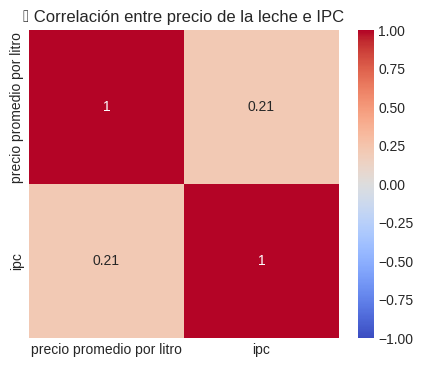

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


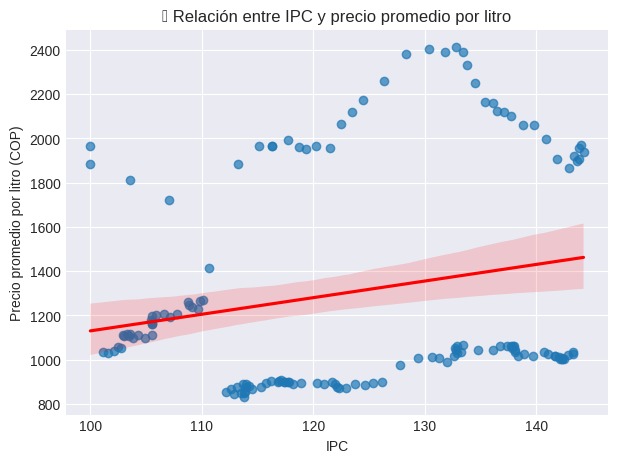

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Calcular correlación ---
corr = leche_ipc[['precio promedio por litro', 'ipc']].corr().iloc[0, 1]

print(f"📈 Correlación entre el precio de la leche y el IPC: {corr:.4f}")

# --- Mapa de calor de correlación ---
plt.figure(figsize=(5, 4))
sns.heatmap(leche_ipc[['precio promedio por litro', 'ipc']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('🔗 Correlación entre precio de la leche e IPC')
plt.show()

# --- Diagrama de dispersión (scatter plot) ---
plt.figure(figsize=(7, 5))
sns.regplot(
    data=leche_ipc,
    x='ipc',
    y='precio promedio por litro',
    scatter_kws={'alpha':0.7},
    line_kws={'color':'red'}
)
plt.title('💡 Relación entre IPC y precio promedio por litro')
plt.xlabel('IPC')
plt.ylabel('Precio promedio por litro (COP)')
plt.show()
